In [2]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
!{sys.executable} -m pip install pandas-profiling
import pandas_profiling
from scripts import project_functions

In [3]:
df = project_functions.load_and_process("../data/raw/diabetes.csv")
df

,Pregnancies,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
566,1,18,38.6,0.412,21,0
372,0,66,35.8,0.545,21,0
94,2,64,24.7,0.761,21,0
486,1,480,40.7,0.536,21,0
208,1,87,33.2,0.289,21,0
...,...,...,...,...,...,...
519,6,326,19.6,0.582,60,0
186,8,495,30.1,0.615,60,1
223,7,190,28.8,0.687,61,0
763,10,180,32.9,0.171,63,0


In [4]:
df.head()

,Pregnancies,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
566,1,18,38.6,0.412,21,0
372,0,66,35.8,0.545,21,0
94,2,64,24.7,0.761,21,0
486,1,480,40.7,0.536,21,0
208,1,87,33.2,0.289,21,0


In [5]:
df.describe()

,Pregnancies,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,3.295165,155.717557,33.072519,0.522476,30.839695,0.330789
std,3.209425,118.879630,7.023947,0.345232,10.199903,0.471097
min,0.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,76.000000,28.400000,0.270000,23.000000,0.000000
50%,2.000000,125.000000,33.200000,0.447000,27.000000,0.000000
75%,5.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.profile_report()

variables:   0%|          | 0/7 [00:00<?, ?it/s]

correlations:   0%|          | 0/6 [00:00<?, ?it/s]

interactions [continuous]:   0%|          | 0/36 [00:00<?, ?it/s]

table:   0%|          | 0/1 [00:00<?, ?it/s]

missing:   0%|          | 0/2 [00:00<?, ?it/s]

warnings:   0%|          | 0/3 [00:00<?, ?it/s]

package:   0%|          | 0/1 [00:00<?, ?it/s]

build report structure:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 566 to 459
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               393 non-null    int64  
 1   Insulin                   393 non-null    int64  
 2   BMI                       393 non-null    float64
 3   DiabetesPedigreeFunction  393 non-null    float64
 4   Age                       393 non-null    int64  
 5   Outcome                   393 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 21.5 KB


In [8]:
df.shape

(393, 6)

<AxesSubplot:>

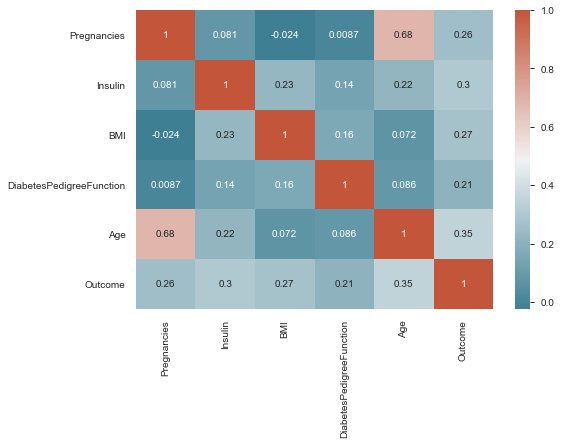

In [9]:
corrilation = df.corr()
sns.heatmap(corrilation, xticklabels=corrilation.columns, yticklabels=corrilation.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

The heat map show me that there is a positive corrolation betweeen pregnacies and outcome as well as age and outcome but the most helpful take  away is that there is a sstrong posotive corrolation between number of pregnacies and age. Also There is a positive corolation between both pregnacies and out come and pregnacies and insulin. increase in basal insulin is an ealry indicator of type 2 diabetes as it shows that the body is steadily losing the ability to control blood sugar which is typical of insulin resistance. This could be influenced by preganacy induced diabetes a phenomenon seen in preganat women who become diabetic because of their preganacy but it goes away after the baby is delivered. The developemnt of diabetes could be because of repeat diabetic condition during pregancy leading to a decline in the bodies ability to control blood sugar and leading diabetes. 

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

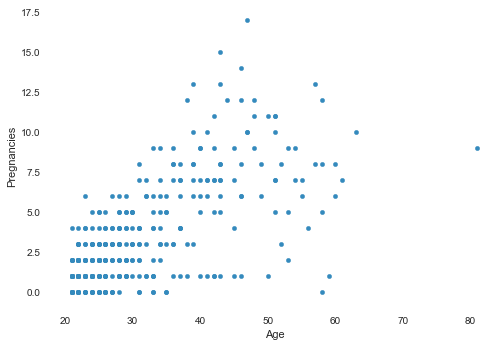

In [10]:
df.plot(kind='scatter',x='Age',y='Pregnancies')

The scatter plot show the positive relationship between age and number of pregnancies. This an expected outcome since the women would have to be getting older with more preganacies due to each pregancy taking about a year if carried ot term. An interesting dataset that should have been collected along side this is the amount of miscarrages each women had. It could play into the reason for the bodies declining ability to produce insulin.

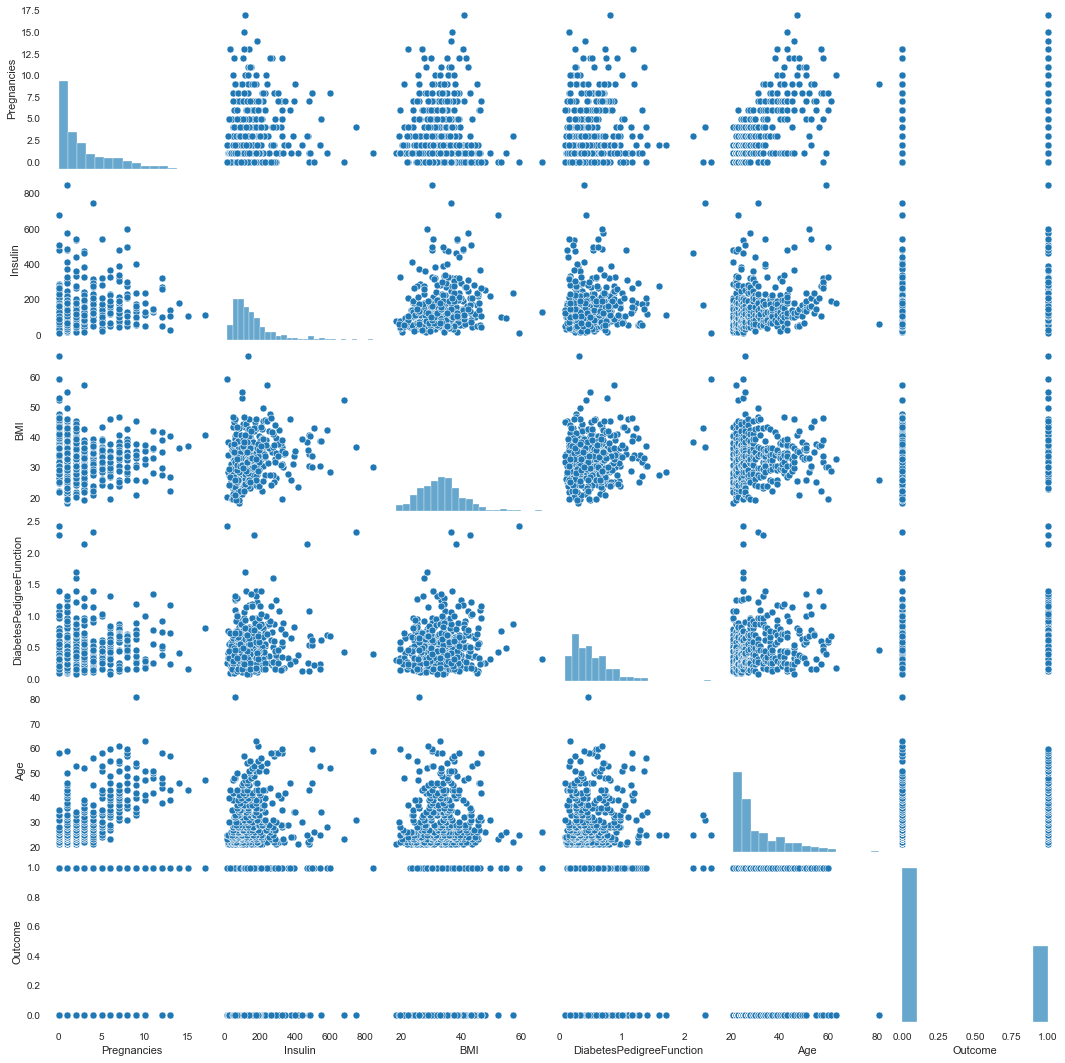

In [11]:
sns.pairplot(df)

The pairplot allows me to  look for more corrolations ussing a visuale aid to ssee. If there are more research questions that could be better than the one I'm currently studying. From this pairplot I can see which scatter plot shold be invetigated further.

<AxesSubplot:>

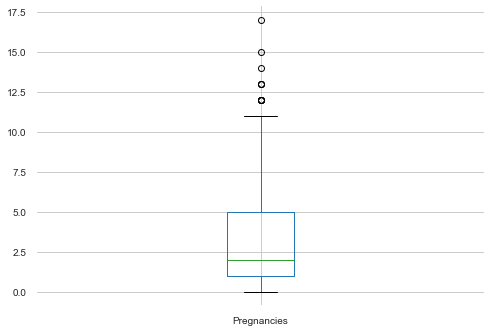

In [12]:
df.boxplot('Pregnancies')

<AxesSubplot:>

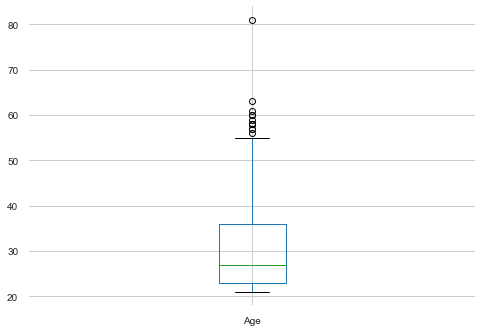

In [13]:
df.boxplot('Age')

The two box plots above show the range and amount of outliers in each of the two data sets.

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

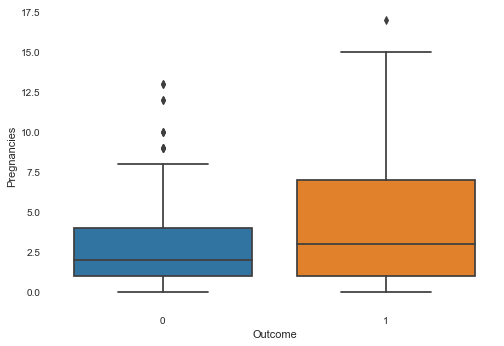

In [14]:
sns.boxplot(y='Pregnancies',x ='Outcome',data=df)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

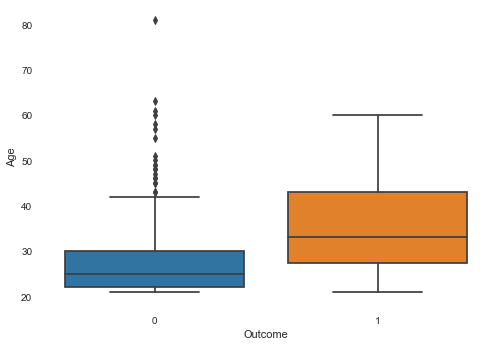

In [15]:
sns.boxplot(y='Age',x ='Outcome',data=df)

The above two boxplots who the corrolation between th outcome which is a positiv or negativee diagnosis for diabetes and pregnancies or age respectivley. On the box plot of the pregnacies vs the outcome we can see that since, 0 is negative for diabetes and 1 is positive for diabetes, there is evidence that the higher the number of pregnacies the higher the chance of getting diabetes. Another intersting obervation is actually in the outliers of the plot for age vs outcome. Some of the oldest women in the dataset tested negative for diabetes meaning that it seems like pregnacies are more closely related to the reason for the women developing diabetes than old age.

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

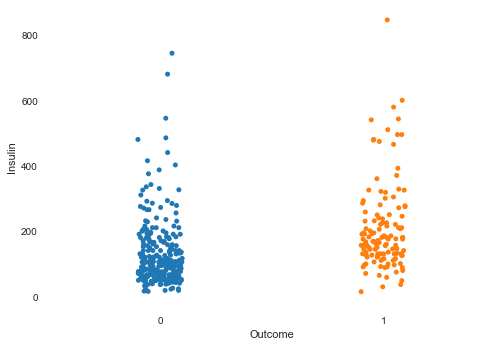

In [16]:
sns.stripplot(data=df,y='Insulin',x='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

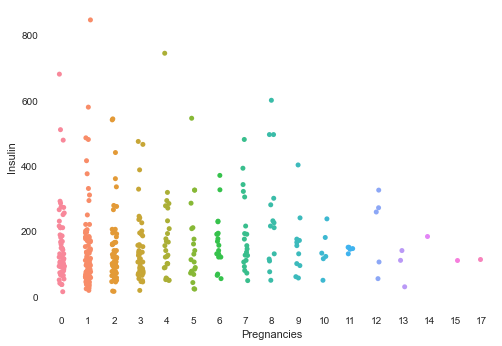

In [17]:
sns.stripplot(data=df,y='Insulin',x='Pregnancies')

From the above scatter plot and strip plot we can see a trend towards higher insulin levels in women who have carried had a larger number of pregancies to term. This could be because of them developing a resistance to insulin which alone isn't a definitave indicator of diabetes but is seen in pre-diabetic patients and from the strip plot we can see an association of higher insulin with a positve result in tesing for diabetes.

## Analysis Summary

The reassearch question I attempted to answer was wether or not number of pregnacies and age have and corrolation with the diagnosis of diabetes. During my EDA I found that there is a positive corolation between age, number of pregnancies and the diagnosis of diabetes specifically in older women over the age of 35. Through the EDA I found that there is a strong corrolation between older women who had more than 5 pregnacies and are diagnosed with diabetes this could probe a second supporting research question. The insulin levels in women as the number of pregnancies increase could also supporting this data and the diagnosis of diabetes bing corolatd with number of pregnancies and age. Through futher investigation this is what I saw in the figures comparing insuling, age and outcomes in a pair plot along with individual strip plots of the data. Thus futher supporting my hypothesis of higher number of pregancies in older women could lead to diabetes or be corrolated as a causative factor of them becoming diabetic. I also used pandas profiling to give me insight into the data allowing me to know where to remove zeros that would be unrealistic such as with the insulin levels and BMI data the zeros are impossible and when remove should make the data set more complete and acurate over all. In conclusion there is evidence supporting the hypothesis that women who have a higher number of pregancies at an older age have a chance of developing diabetes.